In [1092]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import os
# change to your local path to project below
project_path = '/home/jorge/Insync/jorgitoje@gmail.com/OneDrive/Documentos/JORGE/EDUCATION/MASTER_DATASCIENCE/Semester1/AdvancedStatistics/GroupProject/KDS_Statistics_GroupProject'

In [1093]:

dataset_path = os.path.join( '../datasets/USA_houseprices_2014/')

file_name = 'data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path+file_name)

In [1094]:
len(df)

4600

### REMOVE OUTLIERS

In [1096]:
df = df[ df['price'] < 7062500.0]

df = df[ 8000 < df['price']]


In [1098]:
len(df)
df.price.sort_values(ascending=False)

2654    4668000.0
2761    4489000.0
3729    3800000.0
1637    3710000.0
252     3200000.0
          ...    
4345      84350.0
4407      83300.0
4415      83300.0
1587      83000.0
1219      80000.0
Name: price, Length: 4547, dtype: float64

In [1037]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [1038]:
X = df.drop(['price', 'date'], axis = 1)
y = df['price']

In [1039]:
len(y)

4597

# Cleaning NaNs

In [1040]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4597 non-null   object 
 1   price          4597 non-null   float64
 2   bedrooms       4597 non-null   float64
 3   bathrooms      4597 non-null   float64
 4   sqft_living    4597 non-null   int64  
 5   sqft_lot       4597 non-null   int64  
 6   floors         4597 non-null   float64
 7   waterfront     4597 non-null   int64  
 8   view           4597 non-null   int64  
 9   condition      4597 non-null   int64  
 10  sqft_above     4597 non-null   int64  
 11  sqft_basement  4597 non-null   int64  
 12  yr_built       4597 non-null   int64  
 13  yr_renovated   4597 non-null   int64  
 14  street         4597 non-null   object 
 15  city           4597 non-null   object 
 16  statezip       4597 non-null   object 
 17  country        4597 non-null   object 
dtypes: float

[Text(0.5, 1.0, 'Price distribution')]

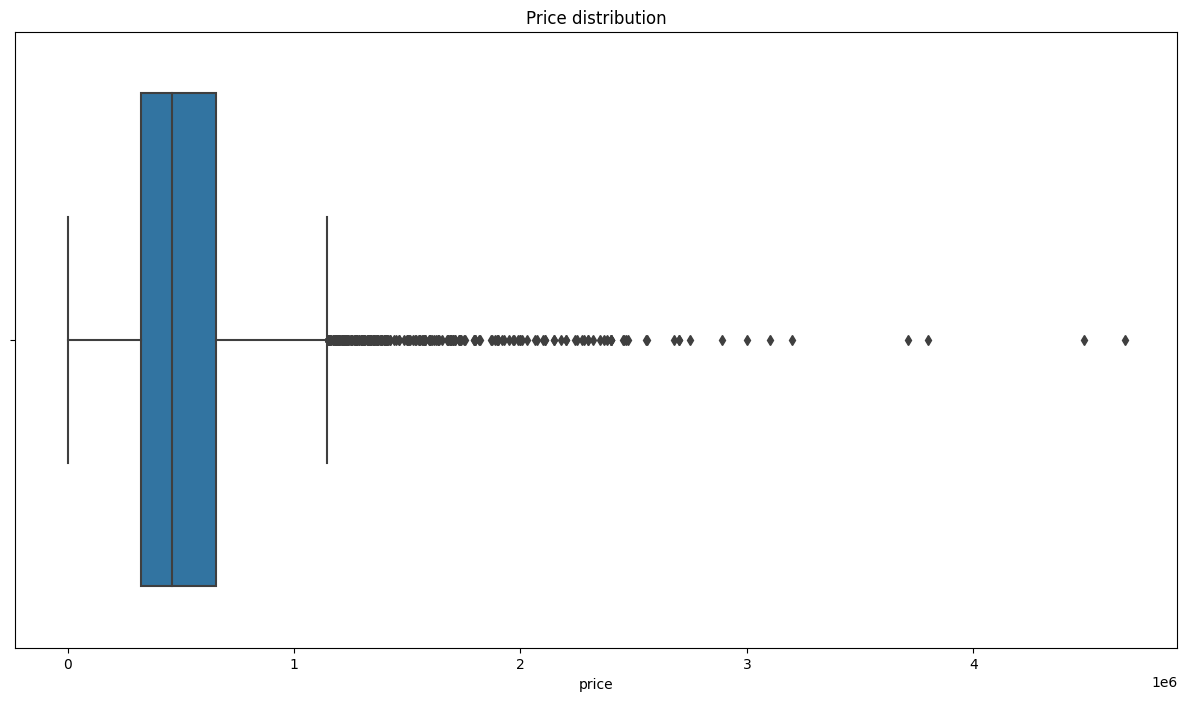

In [1041]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(15,8))
sns.boxplot(x=y).set(title='Price distribution')

There is no null in the dataset

[Text(0.5, 1.0, 'Price distribution')]

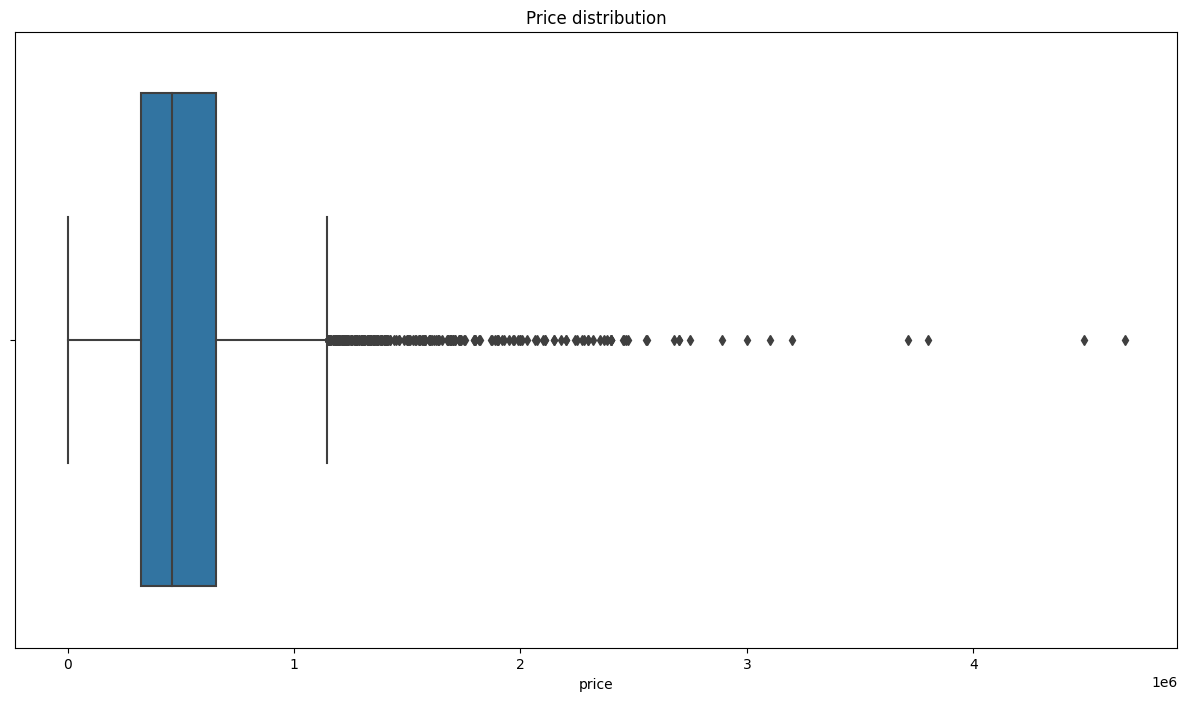

In [1042]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(15,8))
sns.boxplot(x=y).set(title='Price distribution')

There are three big outliers. We should conciderate how to deal with it.

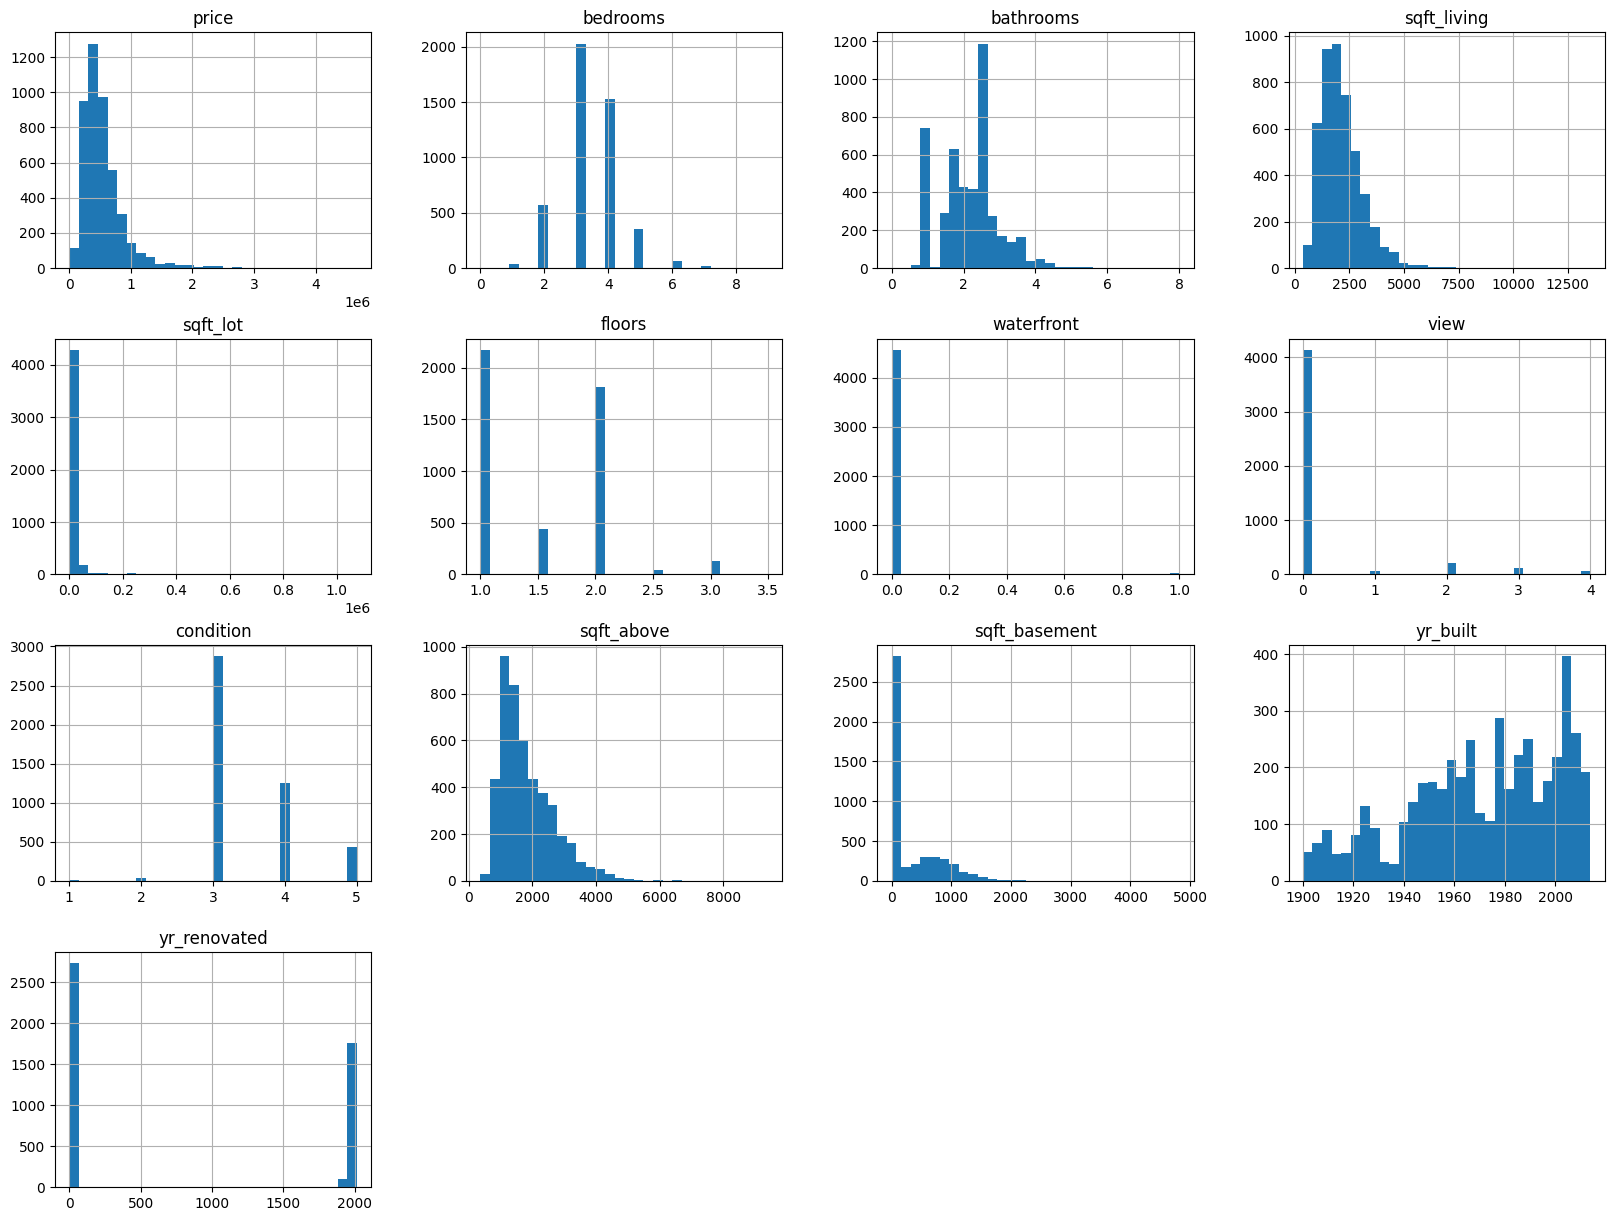

In [1043]:
df.hist(bins=30, figsize=(20,15))
plt.show()

# Feature creation

In [1044]:
import numpy as np
last_modification = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])

In [1045]:
X['last_modification'] = last_modification

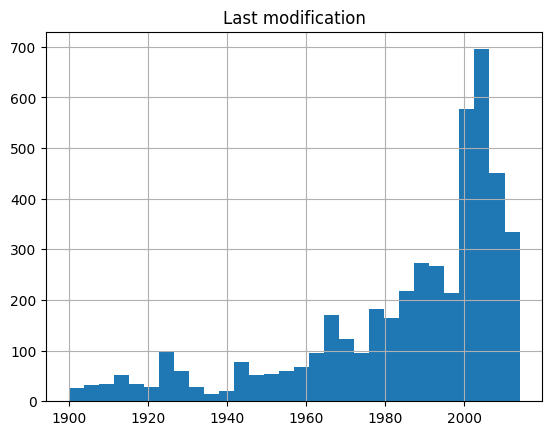

In [1046]:
X['last_modification'].hist(bins=30).set(title='Last modification')
plt.show()

In [1047]:
have_basement = np.where(df['sqft_basement'] == 0, 'false', 'true')
X['have_basement'] = have_basement

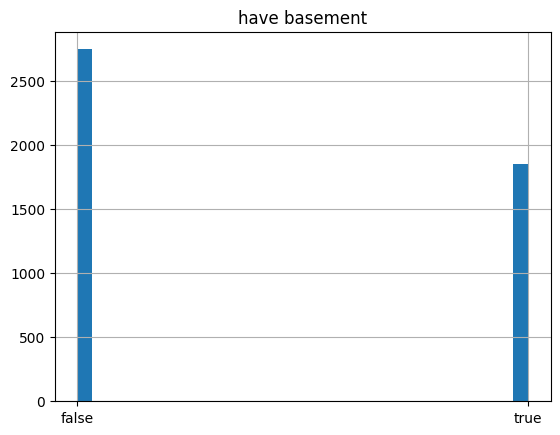

In [1048]:
X['have_basement'].hist(bins=30).set(title='have basement')
plt.show()

#### unique values

In [1049]:
u = df['bedrooms'].unique()
u.sort()
u

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [1050]:
u = df['bathrooms'].unique()
u.sort()
u

array([0.  , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75,
       6.25, 6.5 , 6.75, 8.  ])

In [1051]:
u = df['waterfront'].unique()
u.sort()
u

array([0, 1])

# Encoding 

Choose encoding

In [1052]:
print(len(df['street'].unique()))

4522


In [1053]:
df['street'].nunique()

4522

In [1054]:
df['city'].nunique()

44

In [1055]:
df['statezip'].nunique()

77

In [1056]:
df['country'].nunique()

1

#### Label-encoding

In [1057]:
le = preprocessing.LabelEncoder()

df_columns = [df.street, df.city, df.statezip,
              df.country]
for i in df_columns:
    i = le.fit_transform(i)

X.street = le.fit_transform(df.street)
X.city = le.fit_transform(df.city)
X.statezip = le.fit_transform(df.statezip)
X.country = le.fit_transform(df.country)


print('the set has {} rows and {} columns'.format(X.shape[0], X.shape[1]))
X

the set has 4597 rows and 18 columns


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,last_modification,have_basement
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1521,36,62,0,2005,false
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3896,35,58,0,1921,true
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2290,18,26,0,1966,false
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4260,3,7,0,1963,true
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4349,31,31,0,1992,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3445,35,62,0,1979,false
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,959,3,6,0,2009,false
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4030,32,37,0,2009,false
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3496,35,71,0,1974,true


#### One-hot-encoding

In [1058]:
onehot = pd.concat((df,pd.get_dummies(df.city)),1)

/var/folders/68/8msv38hx38v_2kjty7hk1bsc0000gn/T/ipykernel_51947/772063035.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  onehot = pd.concat((df,pd.get_dummies(df.city)),1)


In [1059]:
onehot.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


# Scaling

check distribution
https://medium.datadriveninvestor.com/how-would-i-know-if-my-variable-distribution-is-gaussian-c3b215383469

Text(0.5, 1.0, 'price')

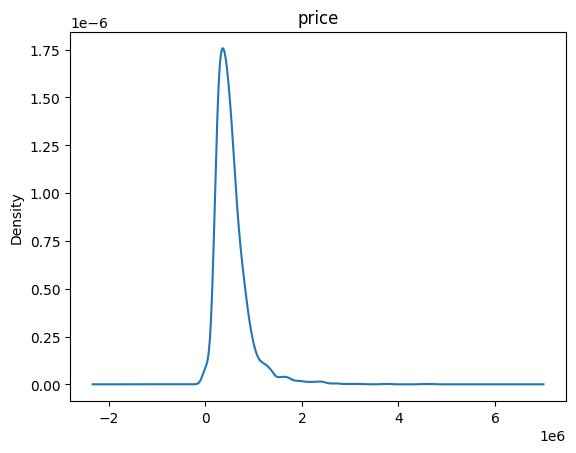

In [1060]:
ax = y.plot.kde()
ax.set_title('price')

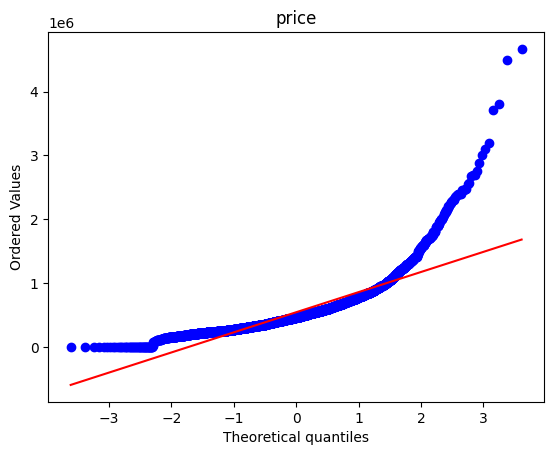

In [1061]:
from scipy.stats import probplot
probplot(x=y,dist='norm',plot=plt)
plt.title('price')
plt.show()

In [1062]:
to_normalize = X.columns.drop('have_basement')

In [1063]:
to_normalize

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'last_modification'],
      dtype='object')

In [1064]:
from scipy.stats import shapiro
print(f'price: {"Not Gaussian" if shapiro(y)[1]<0.05 else "Gaussian"}  {shapiro(y)}')


for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if shapiro(X[col],)[1]<0.05 else "Gaussian"}  {shapiro(X[col])}')


price: Not Gaussian  ShapiroResult(statistic=0.77491295337677, pvalue=0.0)
bedrooms Not Gaussian for  ShapiroResult(statistic=0.8838289976119995, pvalue=0.0)
bathrooms Not Gaussian for  ShapiroResult(statistic=0.9344205856323242, pvalue=5.187186525391175e-41)
sqft_living Not Gaussian for  ShapiroResult(statistic=0.907603919506073, pvalue=0.0)
sqft_lot Not Gaussian for  ShapiroResult(statistic=0.27460914850234985, pvalue=0.0)
floors Not Gaussian for  ShapiroResult(statistic=0.7600812315940857, pvalue=0.0)
waterfront Not Gaussian for  ShapiroResult(statistic=0.05440115928649902, pvalue=0.0)
view Not Gaussian for  ShapiroResult(statistic=0.34342116117477417, pvalue=0.0)
condition Not Gaussian for  ShapiroResult(statistic=0.712992250919342, pvalue=0.0)
sqft_above Not Gaussian for  ShapiroResult(statistic=0.894171953201294, pvalue=0.0)
sqft_basement Not Gaussian for  ShapiroResult(statistic=0.716139554977417, pvalue=0.0)
yr_built Not Gaussian for  ShapiroResult(statistic=0.949281632900238, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [1065]:

from scipy.stats import kstest
normal_dist = y
print(f'{"Not Gaussian" if kstest(normal_dist,"norm")[1]<0.05 else "Gaussian"}  {kstest(normal_dist,"norm")}')

Not Gaussian  KstestResult(statistic=0.9893408744833587, pvalue=0.0)


In [1066]:
print(f'{"Not Gaussian" if kstest(y.values,"norm")[1]<0.05 else "Gaussian"}  {kstest(y.values,"norm")}')
for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if kstest(X[col],"norm")[1]<0.05 else "Gaussian"}  {kstest(X[col],"norm")}')

Not Gaussian  KstestResult(statistic=0.9893408744833587, pvalue=0.0)
bedrooms Not Gaussian for  KstestResult(statistic=0.9685485410994605, pvalue=0.0)
bathrooms Not Gaussian for  KstestResult(statistic=0.8372116157661719, pvalue=0.0)
sqft_living Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
sqft_lot Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
floors Not Gaussian for  KstestResult(statistic=0.8413447460685429, pvalue=0.0)
waterfront Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
view Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
condition Not Gaussian for  KstestResult(statistic=0.9903838413636277, pvalue=0.0)
sqft_above Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
sqft_basement Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
yr_built Not Gaussian for  KstestResult(statistic=1.0, pvalue=0.0)
yr_renovated Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
street Not Gaussian for  KstestResult(statistic=0.99909

In [1067]:
from scipy.stats import normaltest
print(f'{"Not Gaussian" if normaltest(y.values,)[1]<0.05 else "Gaussian"}  {normaltest(y.values)}')



for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if normaltest(X[col],)[1]<0.05 else "Gaussian"}  {normaltest(X[col])}')


Not Gaussian  NormaltestResult(statistic=3143.567906473, pvalue=0.0)
bedrooms Not Gaussian for  NormaltestResult(statistic=265.8375869291549, pvalue=1.8797559020505736e-58)
bathrooms Not Gaussian for  NormaltestResult(statistic=446.54187210775143, pvalue=1.0830898911360241e-97)
sqft_living Not Gaussian for  NormaltestResult(statistic=1766.0426662245125, pvalue=0.0)
sqft_lot Not Gaussian for  NormaltestResult(statistic=7760.055822498042, pvalue=0.0)
floors Not Gaussian for  NormaltestResult(statistic=312.71991109152873, pvalue=1.2408923747330092e-68)
waterfront Not Gaussian for  NormaltestResult(statistic=7776.041602788002, pvalue=0.0)
view Not Gaussian for  NormaltestResult(statistic=3135.141210853672, pvalue=0.0)
condition Not Gaussian for  NormaltestResult(statistic=518.6649192485016, pvalue=2.3623476323826183e-113)
sqft_above Not Gaussian for  NormaltestResult(statistic=1323.295590732234, pvalue=4.4669748678274245e-288)
sqft_basement Not Gaussian for  NormaltestResult(statistic=1504

In [1068]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,last_modification,have_basement
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1521,36,62,0,2005,false
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3896,35,58,0,1921,true
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2290,18,26,0,1966,false
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4260,3,7,0,1963,true
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4349,31,31,0,1992,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3445,35,62,0,1979,false
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,959,3,6,0,2009,false
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4030,32,37,0,2009,false
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3496,35,71,0,1974,true


In [1069]:
min_last_modification_date=min(X['last_modification'])
min_last_modification_date

1900

In [1070]:
df['year_since_1st_renovation']= (X['last_modification']-min_last_modification_date)

In [1071]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year_since_1st_renovation
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,105
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,21
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,66
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,63
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,79
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,109
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,109
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,74


In [1072]:
df = df.filter(items=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'year_since_1st_renovation', 'city', 'statezip', 'price'])
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,year_since_1st_renovation,city,statezip,price
0,3.0,1.50,1340,7912,1.5,0,0,3,0,105,Shoreline,WA 98133,3.130000e+05
1,5.0,2.50,3650,9050,2.0,0,4,5,280,21,Seattle,WA 98119,2.384000e+06
2,3.0,2.00,1930,11947,1.0,0,0,4,0,66,Kent,WA 98042,3.420000e+05
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,63,Bellevue,WA 98008,4.200000e+05
4,4.0,2.50,1940,10500,1.0,0,0,4,800,92,Redmond,WA 98052,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,0,79,Seattle,WA 98133,3.081667e+05
4596,3.0,2.50,1460,7573,2.0,0,0,3,0,109,Bellevue,WA 98007,5.343333e+05
4597,3.0,2.50,3010,7014,2.0,0,0,3,0,109,Renton,WA 98059,4.169042e+05
4598,4.0,2.00,2090,6630,1.0,0,0,3,1020,74,Seattle,WA 98178,2.034000e+05


In [1073]:
# df.to_csv('../datasets/USA_houseprices_2014/USA-HOUSEPRICES-2014_final.csv', encoding='utf-8')


In [1074]:
extracted_col = df["year_since_1st_renovation"]

  
X.insert(1, "year_since_1st_renovation", extracted_col)
print("Second dataframe after adding column from first dataframe:")
X.info()



Second dataframe after adding column from first dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   4597 non-null   float64
 1   year_since_1st_renovation  4597 non-null   int64  
 2   bathrooms                  4597 non-null   float64
 3   sqft_living                4597 non-null   int64  
 4   sqft_lot                   4597 non-null   int64  
 5   floors                     4597 non-null   float64
 6   waterfront                 4597 non-null   int64  
 7   view                       4597 non-null   int64  
 8   condition                  4597 non-null   int64  
 9   sqft_above                 4597 non-null   int64  
 10  sqft_basement              4597 non-null   int64  
 11  yr_built                   4597 non-null   int64  
 12  yr_renovated               4597 non-null   in

In [1075]:
len(y)

4597

In [1076]:
from sklearn.preprocessing import MinMaxScaler

have_basement = X['have_basement']
to_normalize = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'year_since_1st_renovation', 'city', 'statezip']
X_normalized = X[to_normalize]


X_normalized.info()

len(y)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   4597 non-null   float64
 1   bathrooms                  4597 non-null   float64
 2   sqft_living                4597 non-null   int64  
 3   sqft_lot                   4597 non-null   int64  
 4   floors                     4597 non-null   float64
 5   waterfront                 4597 non-null   int64  
 6   view                       4597 non-null   int64  
 7   condition                  4597 non-null   int64  
 8   sqft_basement              4597 non-null   int64  
 9   year_since_1st_renovation  4597 non-null   int64  
 10  city                       4597 non-null   int64  
 11  statezip                   4597 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 466.9 KB


4597

In [1077]:
mm = MinMaxScaler() # creating an instance of the class object
X_normalized = pd.DataFrame(mm.fit_transform(X_normalized), columns=X_normalized.columns)  #fit and transforming MinMaxScaler the dataframe 
X_normalized['have_basement'] = have_basement.reset_index().drop('index',axis=1)
X_normalized.info()

## adding price column



# x = X_normalized.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# X_normalized = pd.DataFrame(x_scaled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   4597 non-null   float64
 1   bathrooms                  4597 non-null   float64
 2   sqft_living                4597 non-null   float64
 3   sqft_lot                   4597 non-null   float64
 4   floors                     4597 non-null   float64
 5   waterfront                 4597 non-null   float64
 6   view                       4597 non-null   float64
 7   condition                  4597 non-null   float64
 8   sqft_basement              4597 non-null   float64
 9   year_since_1st_renovation  4597 non-null   float64
 10  city                       4597 non-null   float64
 11  statezip                   4597 non-null   float64
 12  have_basement              4597 non-null   object 
dtypes: float64(12), object(1)
memory usage: 467.0+ K

In [1078]:
y = y.reset_index().drop('index',axis=1)

X_normalized['price'] = y

X_normalized.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   4597 non-null   float64
 1   bathrooms                  4597 non-null   float64
 2   sqft_living                4597 non-null   float64
 3   sqft_lot                   4597 non-null   float64
 4   floors                     4597 non-null   float64
 5   waterfront                 4597 non-null   float64
 6   view                       4597 non-null   float64
 7   condition                  4597 non-null   float64
 8   sqft_basement              4597 non-null   float64
 9   year_since_1st_renovation  4597 non-null   float64
 10  city                       4597 non-null   float64
 11  statezip                   4597 non-null   float64
 12  have_basement              4597 non-null   object 
 13  price                      4597 non-null   float

In [1079]:
X_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   4597 non-null   float64
 1   bathrooms                  4597 non-null   float64
 2   sqft_living                4597 non-null   float64
 3   sqft_lot                   4597 non-null   float64
 4   floors                     4597 non-null   float64
 5   waterfront                 4597 non-null   float64
 6   view                       4597 non-null   float64
 7   condition                  4597 non-null   float64
 8   sqft_basement              4597 non-null   float64
 9   year_since_1st_renovation  4597 non-null   float64
 10  city                       4597 non-null   float64
 11  statezip                   4597 non-null   float64
 12  have_basement              4597 non-null   object 
 13  price                      4597 non-null   float

In [1080]:
X.head()

,bedrooms,year_since_1st_renovation,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,last_modification,have_basement
0,3.0,105,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1521,36,62,0,2005,false
1,5.0,21,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3896,35,58,0,1921,true
2,3.0,66,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2290,18,26,0,1966,false
3,3.0,63,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4260,3,7,0,1963,true
4,4.0,92,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4349,31,31,0,1992,true


In [1081]:
# X_normalized = X_normalized.filter(items=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'year_since_1st_renovation', 'city', 'statezip', 'price'])
X_normalized

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,year_since_1st_renovation,city,statezip,have_basement,price
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.921053,0.837209,0.815789,false,3.130000e+05
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.813953,0.763158,true,2.384000e+06
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.418605,0.342105,false,3.420000e+05
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.069767,0.092105,true,4.200000e+05
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.807018,0.720930,0.407895,true,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.000000,0.692982,0.813953,0.815789,false,3.081667e+05
4593,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.000000,0.956140,0.069767,0.078947,false,5.343333e+05
4594,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.000000,0.956140,0.744186,0.486842,false,4.169042e+05
4595,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.211618,0.649123,0.813953,0.934211,true,2.034000e+05


In [1082]:
X_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   4597 non-null   float64
 1   bathrooms                  4597 non-null   float64
 2   sqft_living                4597 non-null   float64
 3   sqft_lot                   4597 non-null   float64
 4   floors                     4597 non-null   float64
 5   waterfront                 4597 non-null   float64
 6   view                       4597 non-null   float64
 7   condition                  4597 non-null   float64
 8   sqft_basement              4597 non-null   float64
 9   year_since_1st_renovation  4597 non-null   float64
 10  city                       4597 non-null   float64
 11  statezip                   4597 non-null   float64
 12  have_basement              4597 non-null   object 
 13  price                      4597 non-null   float

In [1083]:
# output_filename = 'USA-HOUSEPRICES-2014-NORMALIZED2".csv'
# X_normalized.to_csv(dataset_path + output_filename, index=False )
X_normalized.to_csv('../datasets/USA_houseprices_2014/preprocessed_data_USAhouseprices2014.csv', encoding='utf-8', index=False)

In [1084]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(pd.DataFrame(y))
print(sc_X)

[[-0.64040887]
 [ 5.14626587]
 [-0.55937866]
 ...
 [-0.35008554]
 [-0.94664719]
 [-0.89858789]]


[Text(0.5, 1.0, 'Price distribution')]

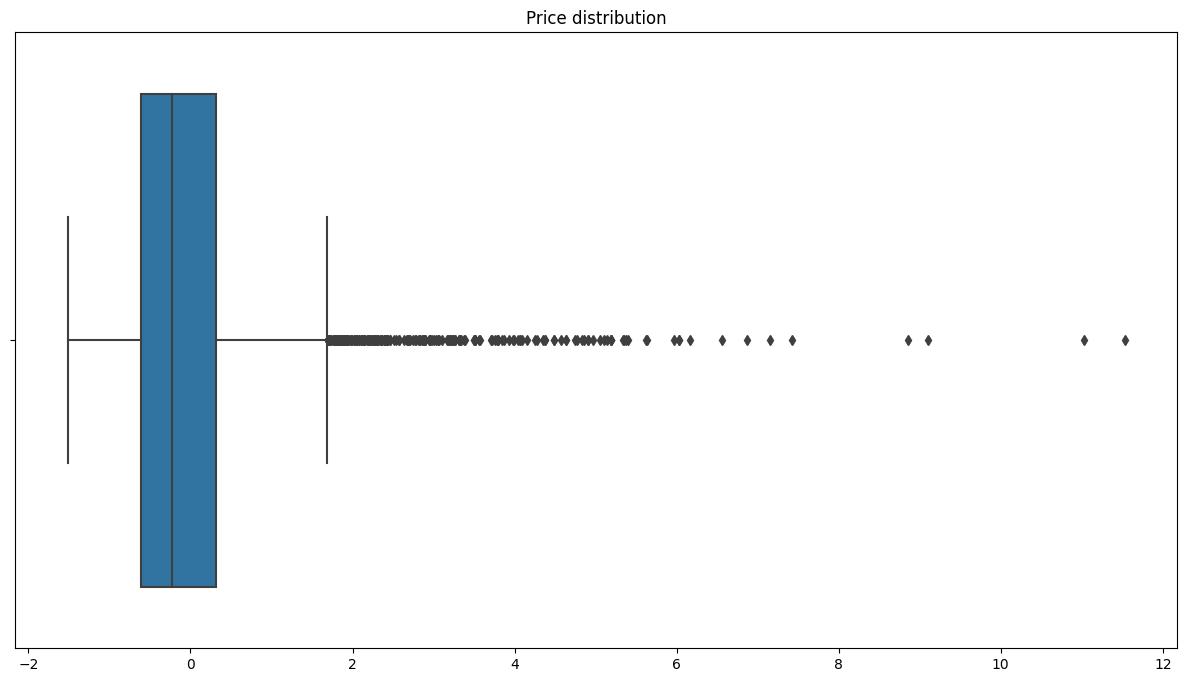

In [1085]:
plt.figure(figsize=(15,8))
sns.boxplot(x=sc_X).set(title='Price distribution')

In [1086]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# minmax = scaler.fit_transform(pd.DataFrame(y))
# print(minmax)

In [1087]:
# plt.figure(figsize=(15,8))
# sns.boxplot(x=minmax).set(title='Price distribution')

# Data exploration

In [1088]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,year_since_1st_renovation,city,statezip,price
0,3.0,1.50,1340,7912,1.5,0,0,3,0,105,Shoreline,WA 98133,313000.0
1,5.0,2.50,3650,9050,2.0,0,4,5,280,21,Seattle,WA 98119,2384000.0
2,3.0,2.00,1930,11947,1.0,0,0,4,0,66,Kent,WA 98042,342000.0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,63,Bellevue,WA 98008,420000.0
4,4.0,2.50,1940,10500,1.0,0,0,4,800,92,Redmond,WA 98052,550000.0


In [1089]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,year_since_1st_renovation,price
count,4597.000000,4597.000000,4597.000000,4.597000e+03,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4.597000e+03
mean,3.400696,2.160268,2137.825973,1.484992e+04,1.512182,0.006961,0.240374,3.451816,311.632586,85.034153,5.421967e+05
std,0.908800,0.783257,956.341251,3.589443e+04,0.538310,0.083151,0.778210,0.677337,463.256588,26.870429,3.579301e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,0.000000,73.000000,3.225000e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,0.000000,94.000000,4.600000e+05
75%,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,610.000000,105.000000,6.530000e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,4820.000000,114.000000,4.668000e+06


In [1090]:
list(df.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_basement',
 'year_since_1st_renovation',
 'city',
 'statezip',
 'price']

[Text(0.5, 1.0, 'Price distribution')]

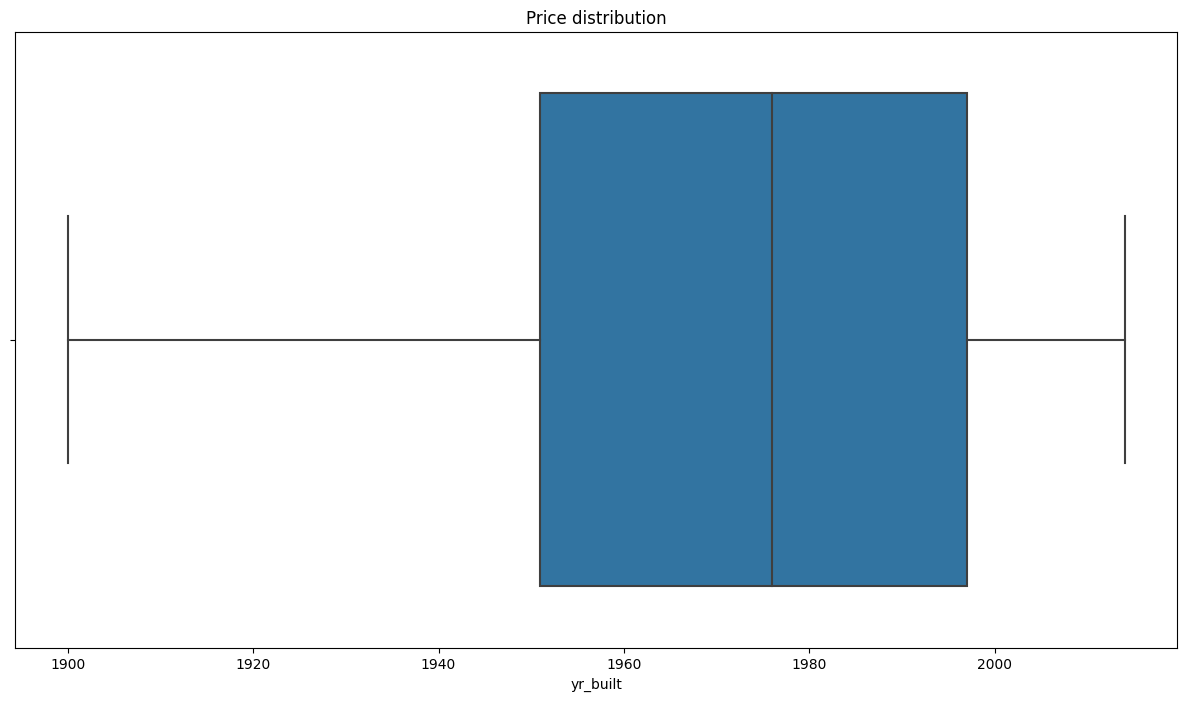

In [1091]:
plt.figure(figsize=(15,8))
sns.boxplot(x=X['yr_built']).set(title='Price distribution')